In [2]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Generate data
np.random.seed(1)

# True parameter values
sigma = 1
beta = 2
# Size of dataset
size = 400
# Predictor variable
X = np.random.randn(size)
# Simulate outcome variable
Y = beta*X + np.random.randn(size)*sigma


data = pd.DataFrame({'X': X, 'Y': Y})

[-5, 5, -5, 5]

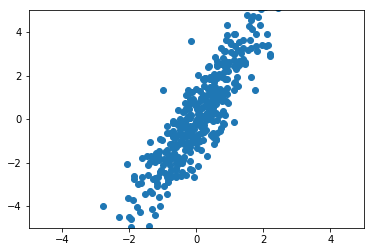

In [25]:
# Plot data
plt.plot(data['X'],data['Y'],'o')
plt.axis([-5, 5, -5, 5])

In [40]:
# Create probabilistic model
basic_model = pm.Model()
with basic_model:
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)
    #
    X = pm.Normal('X', mu=0, sd=1, observed=data['X'])
    mu = beta*X
    Y = pm.Normal('Y', mu=mu, sd=sigma, observed=data['Y'])


In [44]:
# Create posterior samples of unobserved RVs
nr_of_samples = 100
with basic_model:
    trace = pm.sample(nr_of_samples,chains=4)
#ppc = pm.sample_ppc(trace, samples=int(nr_of_samples*4/100), model=basic_model)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta]
Sampling 4 chains: 100%|██████████| 2400/2400 [00:00<00:00, 4182.31draws/s]
The acceptance probability does not match the target. It is 0.8841740948996353, but should be close to 0.8. Try to increase the number of tuning steps.


In [ ]:
# Create posterior samples of observed RVs


In [45]:
# Create posterior samples of observed RVs
size_ppc = len(trace['beta'])

X_ppc = np.random.normal(0,1,size=size_ppc)
mu_ppc = np.multiply(trace['beta'],X_ppc)
Y_ppc = np.random.normal(mu_ppc,trace['sigma'],size=size_ppc)

[-5, 5, -5, 5]

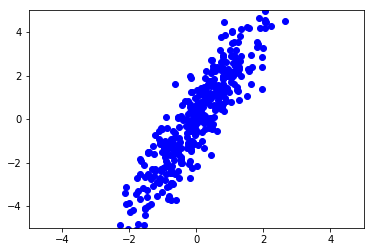

In [46]:
# Plot posterior samples
plt.plot(X_ppc,Y_ppc,'bo')
plt.axis([-5, 5, -5, 5])